In [1]:
# TODO: Handle leverage by security
# TODO: Handle exposures
# TODO: Backtest find the best

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from utility.types import RebalanceFrequencyEnum, AllocationMethodsEnum, RegimeDetectionModels

from data.universe import Universe
from data.benchmark import Benchmark

from backtest.backtest import Backtester



Loading BokehJS ...

In [3]:
bench_obj = Benchmark(RebalanceFrequencyEnum.MONTH_END)
bench_obj.benchmark_perf

Date
2019-10-01    0.999993
2019-10-02    0.981493
2019-10-03    0.983629
2019-10-04    0.990607
2019-10-07    0.993187
                ...   
2024-02-09    1.323521
2024-02-12    1.329863
2024-02-13    1.318233
2024-02-14    1.323629
2024-02-15    1.330020
Freq: B, Name: benchmark_perf, Length: 1143, dtype: float64

In [4]:
univ_obj = Universe()
universe = univ_obj.get_universe_returns()
universe

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


In [5]:
d =univ_obj.get_universe_returns()
d

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


Backtesting portfolio...:   0%|          | 0/1143 [00:00<?, ?it/s]c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



-------  Returns statistical information  --------
Expected return annualized: 8.14 % vs 6.88 % (buy and hold)
CAGR: 7.12 % vs 6.11 % (buy and hold)
Expected volatility annualized: 15.79 % vs 13.82 % (buy and hold)
Specific volatility (diversifiable) annualized: 9.03 %
Systematic volatility annualized: 12.95 %
Skewness: -0.76 vs -1.01 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 12.68 vs -1.01 (buy and hold) , >3 = fat tails, <3 = thin tails
95%-VaR: -1.34 % vs -1.26 % (buy and hold) -> the lower the better
95%-CVaR: -2.48 % vs -2.32 % (buy and hold) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -31.57 % vs -25.68 % (buy and hold)
Kelly criterion: 5.34 % vs 5.19 % (buy and hold)
Benchmark sensitivity (beta): 0.94 vs 1 (buy and hold)
Determination coefficient R²: 0.67
Tracking error annualized: 9.08 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe ratio annualize

c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


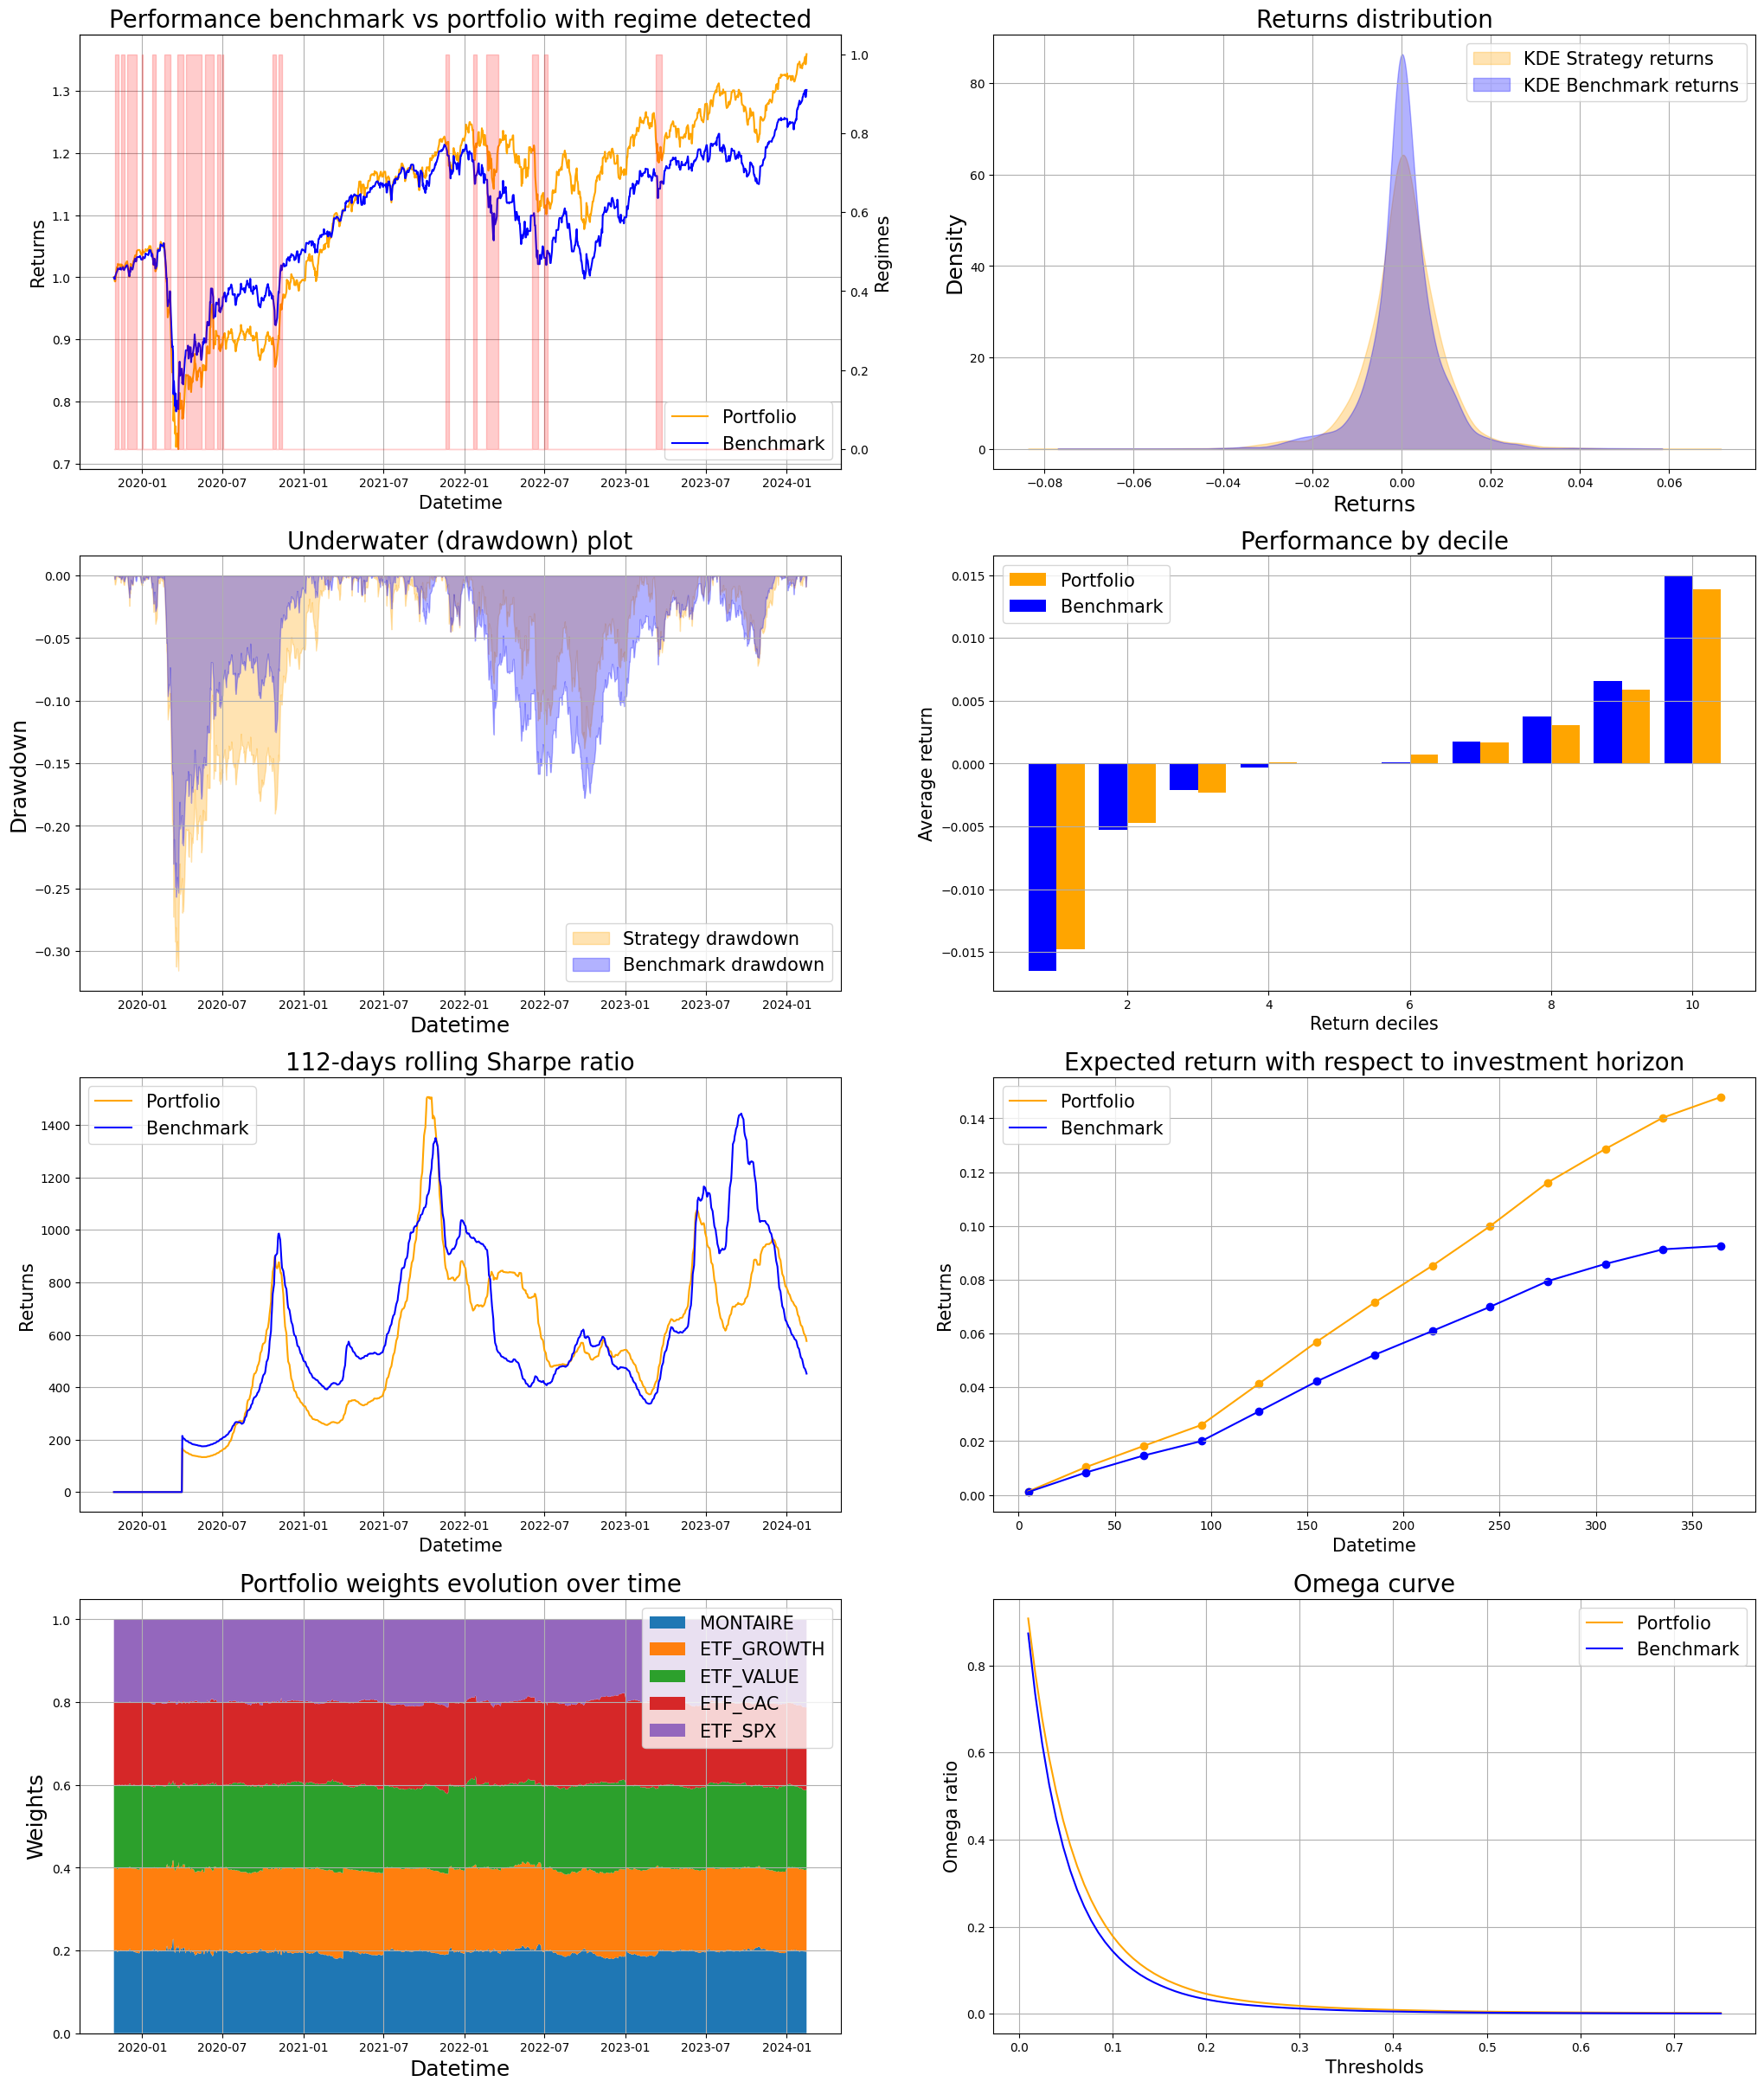

In [6]:

bk_tester = Backtester(
    universe_returns=univ_obj.get_universe_returns(),
    market_returns=universe["ETF_GROWTH"],
    benchmark_returns=bench_obj.benchmark_returns,
)


ptf_and_bench, ptf_weights_equal_weight, regimes, metrics_df = bk_tester.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    rebalance_frequency=RebalanceFrequencyEnum.QUARTER_START,
    market_regime_model=RegimeDetectionModels.HIDDEN_MARKOV_MODEL,
    transaction_cost_by_securities={k: 0.001 for k in universe.columns},
    verbose=False,
)


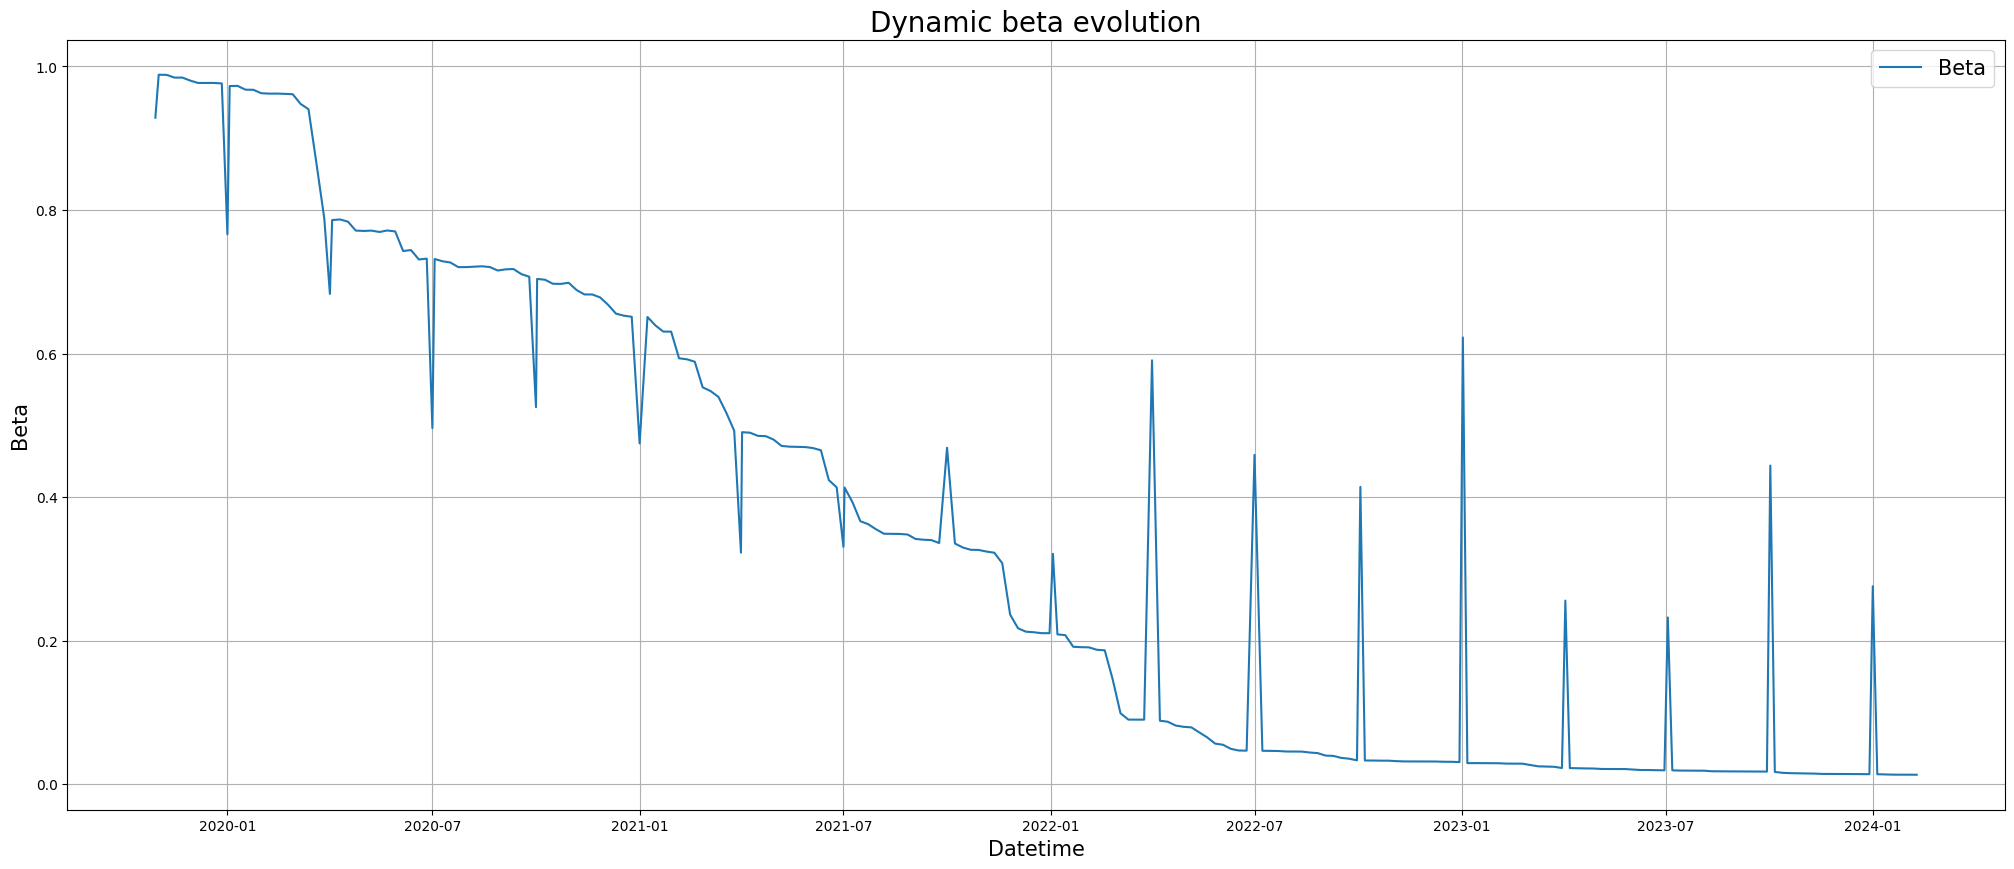

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.plot(regimes.index,regimes.next_beta, label="Beta")
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Beta", fontsize=15)
ax.set_title(f"Dynamic beta evolution", fontsize=20)
ax.grid()
ax.legend(fontsize=15)

